# On regarde les données disponibles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the Excel file
file_path = '/home/leo/Documents/These/Données/Rearangement_OB2.xlsx'  # Replace with the path to your file
df = pd.read_excel(file_path)

/home/leo/micromamba/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [18]:
# Filter rows where 'species' column is equal to 'ae_poly'
Poly_df = df[(df['Spc'] == 'ae_poly') & (df['Motu'] == 'Onetahi')]
Aegipty_df = df[(df['Spc'] == 'ae_aeg') & (df['Motu'] == 'Onetahi')]

In [19]:

# Clean 'Nb_ind' column by replacing 'NA ' or NaN values with 0
#Poly_df['Nb_ind'] = pd.to_numeric(Poly_df['Nb_ind'], errors='coerce').fillna(0)

# Ensure 'Date' column is in datetime format
Poly_df['Date'][:-82] = pd.to_datetime(Poly_df['Date'][:-82])
Aegipty_df['Date'][:-80] = pd.to_datetime(Aegipty_df['Date'][:-80])

# Convert month names to month numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

date_poly = pd.DataFrame({
    'Day': Poly_df['Date'][-82:].values,
    'Month': Poly_df['Month'][-82:].map(month_map).values,
    'Year': [2024] * 82
})
date_aeg = pd.DataFrame({
    'Day': Aegipty_df['Date'][-80:].values,
    'Month': Aegipty_df['Month'][-80:].map(month_map).values,
    'Year': [2023] * 80
})
date_aeg[['Year', 'Month', 'Day']]

/tmp/ipykernel_16375/4239141402.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Poly_df['Date'][:-82] = pd.to_datetime(Poly_df['Date'][:-82])
/tmp/ipykernel_16375/4239141402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

,Year,Month,Day
0,2023,11,12
1,2023,11,12
2,2023,11,12
3,2023,11,12
4,2023,11,12
...,...,...,...
75,2023,11,19
76,2023,11,19
77,2023,11,19
78,2023,11,19


In [21]:
Poly_df['Date'][-82:] = pd.to_datetime(date_poly[['Year', 'Month', 'Day']])
Aegipty_df['Date'][-80:] = pd.to_datetime(date_aeg[['Year', 'Month', 'Day']])
# Optionally, save the filtered data to a new Excel file
#Poly_df.to_excel('ae_poly_data.xlsx', index=False)

/tmp/ipykernel_16375/3716086744.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Poly_df['Date'][-82:] = pd.to_datetime(date_poly[['Year', 'Month', 'Day']])
/tmp/ipykernel_16375/3716086744.py:1: SettingWithCopyWarning: 
A value is trying 

In [22]:
# Split the dataset based on the 'action' column
df_poly_r = Poly_df[Poly_df['Action'] == 'Release']  # Rows where 'action' is 'R'
df_poly_c = Poly_df[Poly_df['Action'] == 'Capture']  # Rows where 'action' is 'C'

df_aegipty_c = Aegipty_df[Aegipty_df['Action'] == 'Capture']  # Rows where 'action' is 'R'

#df_r.fillna(0, inplace=True)
#df_c.fillna(0, inplace=True)
# Instead of replacing Na with 0, you can also drop rows with Na values
df_poly_r.dropna(subset=['Nb_ind'], inplace=True)
df_poly_c['Nb_ind'].replace('NA ', np.nan, inplace=True)
df_poly_c.dropna(subset=['Nb_ind'], inplace=True)
df_poly_c.dropna(subset=['Date'], inplace=True)

df_aegipty_c['Nb_ind'].replace('NA ', np.nan, inplace=True)
df_aegipty_c.dropna(subset=['Nb_ind'], inplace=True)
df_aegipty_c.dropna(subset=['Date'], inplace=True)


/tmp/ipykernel_16375/3876062033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poly_r.dropna(subset=['Nb_ind'], inplace=True)
/tmp/ipykernel_16375/3876062033.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_poly_c['Nb_ind'].replace('NA ', np.nan, inplace=True)
/tmp/ipykernel_16375/3876062033.py:11: FutureWarning: Downcasting be

In [23]:
list_c_dates = list(df_poly_c['Nb_ind'])
list_c_dates[1608]

0.0

In [24]:
# Get the numbre of mosquitoes released and captured 
nb_poly_mosquitoes_released = df_poly_r['Nb_ind'].sum()
nb_poly_mosquitoes_captured = df_poly_c['Nb_ind'].sum()
nb_aegipty_mosquitoes_captured = df_aegipty_c['Nb_ind'].sum()

print(f"Number of Ae. aegypti mosquitoes captured: {nb_aegipty_mosquitoes_captured}")
print(f"Number of Ae. polynesiensis mosquitoes captured: {nb_poly_mosquitoes_captured}")
print(f"Number of Ae. polynesiensis mosquitoes released: {nb_poly_mosquitoes_released}")

Number of Ae. aegypti mosquitoes captured: 3406.0
Number of Ae. polynesiensis mosquitoes captured: 23048.0
Number of Ae. polynesiensis mosquitoes released: 6853590


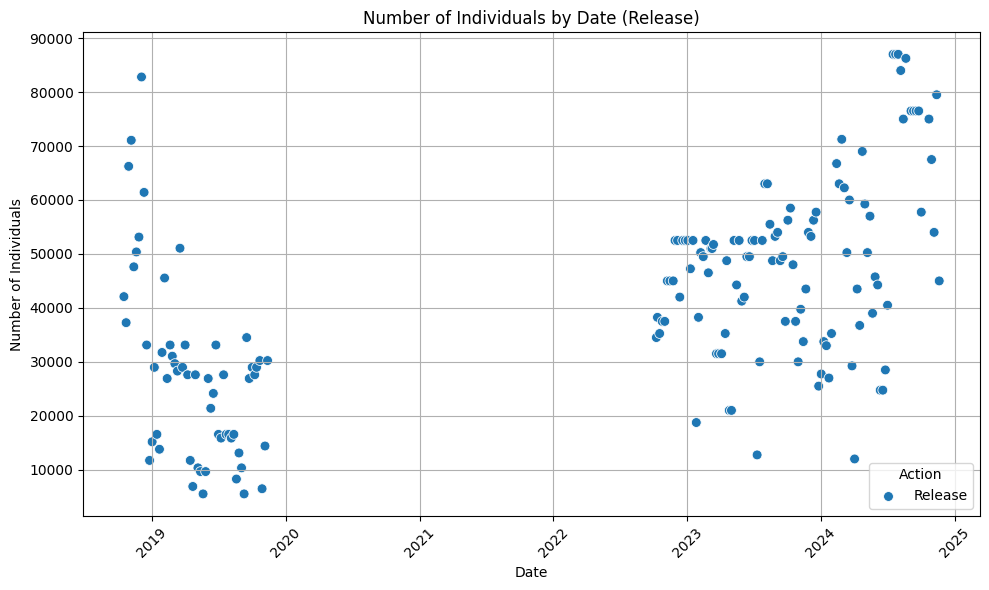

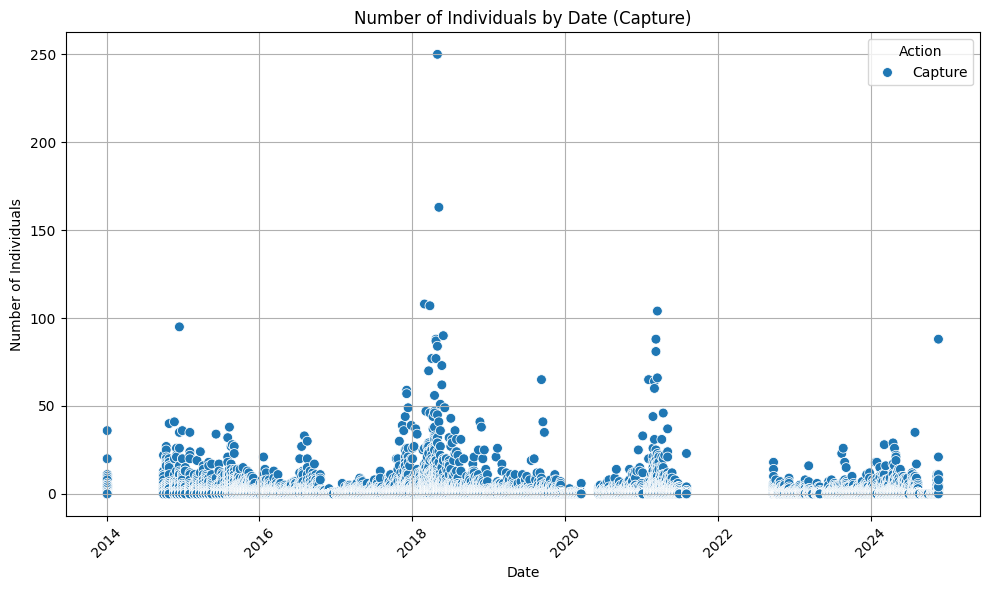

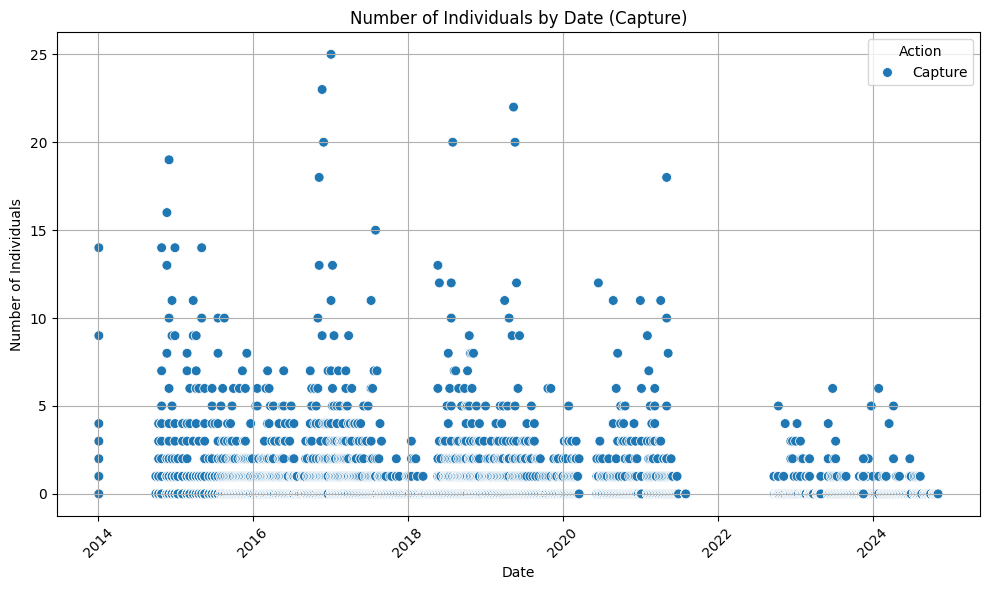

In [25]:
# Make a seaborn histogram the data for Release events 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_r, x='Date', y='Nb_ind', hue='Action', s=50)
plt.title('Number of Individuals by Date (Release)')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the data for Capture events
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_poly_c, x='Date', y='Nb_ind', hue='Action', s=50)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the data for Capture events
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_aegipty_c, x='Date', y='Nb_ind', hue='Action', s=50)
plt.title('Number of Individuals by Date (Capture)')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()